## The advertising experiment between Social Media Budget and Sales (in Thousands $ ).

#### Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
import scipy.stats as stats

#### Load and data processing

In [2]:
df=pd.read_csv("Marketing_Data.csv")
df.head(10)

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
5,114.84,1.68,8.88,11.40
6,348.84,4.92,10.20,15.36
7,320.28,52.56,6.00,30.48
8,89.64,59.28,54.84,17.64
9,51.72,32.04,42.12,12.12


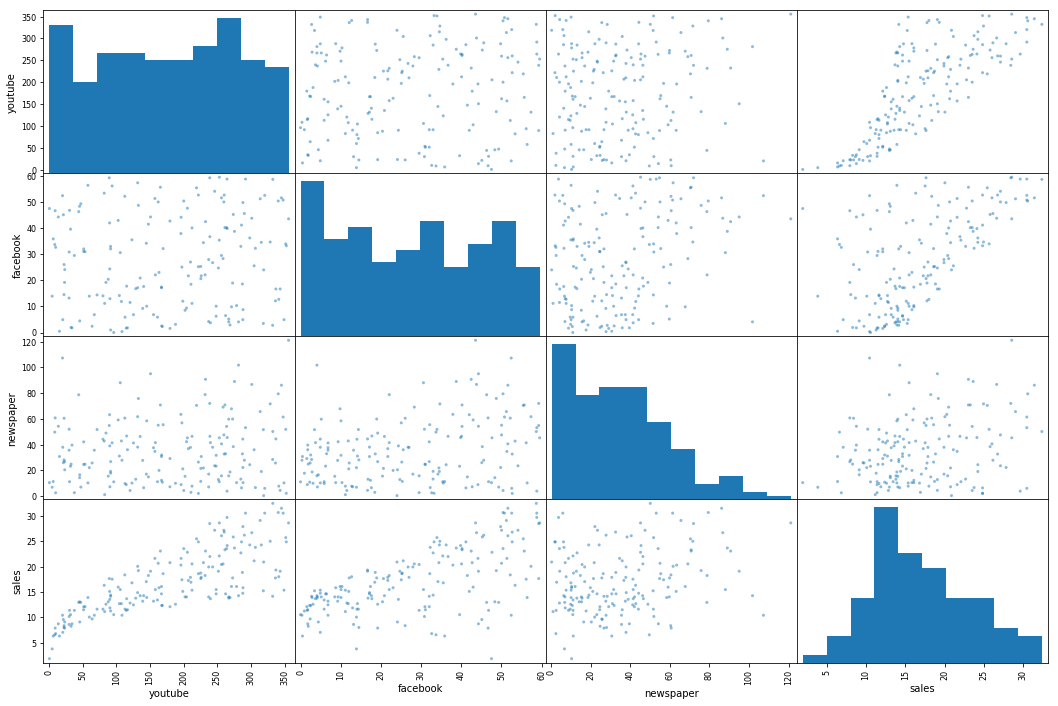

In [3]:
pd.plotting.scatter_matrix(df,figsize=(18,12))
plt.show()

At the figure above we can see plots for every pair of features, on diagonal are histograms of columns. 
Also we can see after this visualization that our features are weakly correlated, only sales with youtube and facebook have visuable positive relationship. Below corelation matrix confirm this conclusions

In [4]:
df.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


In [5]:
Y=df["sales"].values
X1=df["youtube"].values
X2=df["facebook"].values
X3=df["newspaper"].values

In [6]:
X=np.column_stack((X1,X2,X3)) # column stack function join three columns from our dataset to one matrix
X=np.c_[np.ones(len(X1)),X] # by this function we can add to matrix X column containing only ones, that's bias 
X

array([[  1.  ,  84.72,  19.2 ,  48.96],
       [  1.  , 351.48,  33.96,  51.84],
       [  1.  , 135.48,  20.88,  46.32],
       [  1.  , 116.64,   1.8 ,  36.  ],
       [  1.  , 318.72,  24.  ,   0.36],
       [  1.  , 114.84,   1.68,   8.88],
       [  1.  , 348.84,   4.92,  10.2 ],
       [  1.  , 320.28,  52.56,   6.  ],
       [  1.  ,  89.64,  59.28,  54.84],
       [  1.  ,  51.72,  32.04,  42.12],
       [  1.  , 273.6 ,  45.24,  38.4 ],
       [  1.  , 243.  ,  26.76,  37.92],
       [  1.  , 212.4 ,  40.08,  46.44],
       [  1.  , 352.32,  33.24,   2.16],
       [  1.  , 248.28,  10.08,  31.68],
       [  1.  ,  30.12,  30.84,  51.96],
       [  1.  , 210.12,  27.  ,  37.8 ],
       [  1.  , 107.64,  11.88,  42.84],
       [  1.  , 287.88,  49.8 ,  22.2 ],
       [  1.  , 272.64,  18.96,  59.88],
       [  1.  ,  80.28,  14.04,  44.16],
       [  1.  , 239.76,   3.72,  41.52],
       [  1.  , 120.48,  11.52,   4.32],
       [  1.  , 259.68,  50.04,  47.52],
       [  1.  , 

#### Linear regression using normal equations

In [7]:
class lin_reg():

    def coef(self, X, Y):
        b=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
        return b
    
    def mse(self):
        k=3  #number of features
        n=len(Y) #number of data
        MSE=(Y.T.dot(Y)-Y.T.dot(X.dot(lm.coef(X,Y))))/(n-k-1)
        return MSE
    
    def y_hat(self, X1, X2, X3):
        y_hat=lm.coef(X,Y)[0]+lm.coef(X,Y)[1]*X1+lm.coef(X,Y)[2]*X2+lm.coef(X,Y)[3]*X3  
        return y_hat
    
    def R2score(self):
        R2=np.sum((y_hat-np.mean(Y))**2)/np.sum((Y-np.mean(Y))**2)
        return R2
    
    def Residuals(self):
        eps=Y-y_hat # Subtract predictions from real value of sales
        return eps
        

In [8]:
lm=lin_reg()

In [9]:
print("Coefficients: ", lm.coef(X,Y))

Coefficients:  [3.50587099 0.04523544 0.18839783 0.00427949]


In [10]:
print("Mean squared error: ", lm.mse())
print("Root mean squared error: ", lm.mse()**(1/2))

Mean squared error:  4.039767300704157
Root mean squared error:  2.009917237277236


In [11]:
y_hat=lm.y_hat(X1,X2,X3)
lm.y_hat(12,5,7)  # example of using prediction

5.020641897484869

In [12]:
lm.R2score()

0.900475235853936

In [36]:
model = sm.OLS(Y,X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     503.7
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.09e-83
Time:                        13:14:50   Log-Likelihood:                -359.99
No. Observations:                 171   AIC:                             728.0
Df Residuals:                     167   BIC:                             740.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5059      0.400      8.772      0.000       2.717       4.295
x1             0.0452      0.002     29.830      0.000       0.042       0.048
x2             0.1884      0.009     20.895      0.000       0.171       0.206
x3             0.0043      0.007      0.658      0.511      -0.009       0.017
==============================================================================
Omnibus:                       57.934   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.792
Skew:                          -1.388   Prob(JB):                     4.47e-36
Kurtosis:                       6.891   Cond. No.                         544.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see model fitting factor is quite high, but other parameters don't look so good as R2, so that means we can do next diagnosis.

#### Residuals

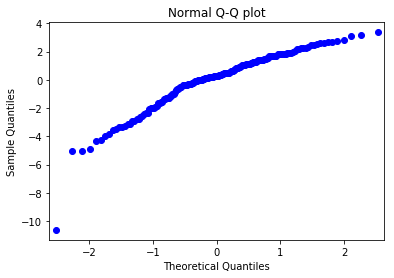

In [13]:
sm.qqplot(lm.Residuals(),dist="norm")
plt.title("Normal Q-Q plot")
plt.show()

We can see that we have outliers in model, we should delete them to improve predictions

In [14]:
print("Minimun: ",min(lm.Residuals()),"Maximum:", max(lm.Residuals()))

Minimun:  -10.621211326331377 Maximum: 3.370077773980798


In [15]:
eps_new=np.delete(lm.Residuals(),np.where(abs(lm.Residuals()) > 3)) # Delete residuals where value is greater than 3 or smaller than -3

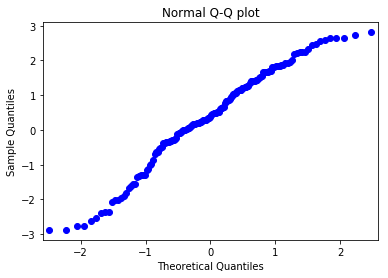

In [16]:
sm.qqplot(eps_new,dist="norm")
plt.title("Normal Q-Q plot")
plt.show()

In [17]:
stats.jarque_bera(lm.Residuals())

(162.79169129912344, 0.0)

In [18]:
stats.jarque_bera(eps_new) # we can see large change of values, it means that eps_new is more from normal distribution than previous version of residuals

(5.971479920310756, 0.05050212016304956)

#### New model

In [22]:
Y_new=np.delete(Y,np.where(abs(lm.Residuals()) > 3)) #delete from Y column indexes where residuals are not between -3 and 3

In [32]:
X1_new=np.delete(X1,np.where(abs(lm.Residuals()) > 3)) #delete from X... column indexes where residuals are not between -3 and 3 etc.
X2_new=np.delete(X2,np.where(abs(lm.Residuals()) > 3))
X3_new=np.delete(X3,np.where(abs(lm.Residuals()) > 3))


In [35]:
X_new=np.column_stack((X1_new,X2_new,X3_new)) # column stack function join three columns from our dataset to one matrix
X_new=np.c_[np.ones(len(X1_new)),X_new] # by this function we can add to matrix X column containing only ones, that's bias 
X_new.shape

(153, 4)

In [37]:
print("Coefficients: ", lm.coef(X_new,Y_new))

Coefficients:  [4.03096992 0.04336891 0.19318425 0.00547214]


In [83]:
model2 = sm.OLS(Y_new,X_new)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     933.2
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           2.48e-96
Time:                        18:27:28   Log-Likelihood:                -264.94
No. Observations:                 153   AIC:                             537.9
Df Residuals:                     149   BIC:                             550.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0310      0.291     13.853      0.000       3.456       4.606
x1             0.0434      0.001     35.353      0.000       0.041       0.046
x2             0.1932      0.007     28.104      0.000       0.180       0.207
x3             0.0055      0.005      1.099      0.274      -0.004       0.015
==============================================================================
Omnibus:                        5.951   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                5.975
Skew:                          -0.449   Prob(JB):                       0.0504
Kurtosis:                       2.639   Cond. No.                         542.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Value of F statistic is quite large and p value(propability that our features as irrelevant) is almost zero. R2 and adjusted R2 are similar and both high, so we assume that our model acceptable predict new amounts of sales. For X3 feature we might see small t student value, so this should be check in next steps.

In [78]:
from statsmodels.stats.outliers_influence import OLSInfluence #influence of each observation
test_class = OLSInfluence(result2)
test_class.dfbetas 

array([[ 5.33035168e-02, -5.58257412e-02, -2.89447963e-02,
         4.84133494e-02],
       [ 2.74339738e-02, -4.51692128e-02,  5.03515198e-03,
        -1.06432631e-02],
       [ 3.35845011e-03, -2.40419682e-03, -2.49994392e-03,
         3.43032084e-03],
       [ 1.49399779e-01, -4.70693852e-02, -1.68103983e-01,
         6.76515918e-02],
       [-9.15901249e-03, -1.70150764e-01,  3.82885951e-03,
         1.62662676e-01],
       [ 2.07772260e-01, -3.58594532e-02, -1.35755506e-01,
        -7.30559440e-02],
       [-8.65663062e-02,  2.06939100e-01,  2.40675476e-01,
        -2.86181869e-01],
       [-4.21374368e-03,  1.79294744e-01, -2.28281119e-01,
        -4.87390426e-02],
       [-3.46951347e-02,  5.10020161e-02, -1.41731359e-02,
        -1.31505986e-02],
       [-3.38783963e-02,  4.57768262e-02,  4.73251526e-02,
        -1.73175380e-02],
       [ 2.71876667e-05, -1.07015582e-03,  3.61201357e-04,
        -8.96136016e-05],
       [ 9.35632982e-03, -6.58315993e-03, -2.25195426e-02,
      

#### Variance Inflation Factor 

VIF check collinearity between each columns

In [50]:
vif = [variance_inflation_factor(X_new,i) for i in range(X_new.shape[1])]
vif

[6.750025115801329, 1.068743151814574, 1.1631695356013125, 1.1402739106120543]

We can assume that our features are quite independent

#### Irrelevancy of features in new model


In [65]:
print("Hypothesis that X1 is irrelevant",result2.f_test([0,1,0,0])) #Compute the F-test for a joint linear hypothesis.
print("Hypothesis that X2 is irrelevant",result2.f_test([0,0,1,0])) #Compute the F-test for a joint linear hypothesis.
print("Hypothesis that X3 is irrelevant",result2.f_test([0,0,0,1])) #Compute the F-test for a joint linear hypothesis.

Hypothesis that X1 is irrelevant <F test: F=array([[1249.82196559]]), p=2.408841039305e-74, df_denom=149, df_num=1>
Hypothesis that X2 is irrelevant <F test: F=array([[789.81092546]]), p=1.981119865626343e-61, df_denom=149, df_num=1>
Hypothesis that X3 is irrelevant <F test: F=array([[1.20670985]]), p=0.2737566007338483, df_denom=149, df_num=1>


We can see that X3 can be remove from model, because p value is greater than 0.05. Let's visualize this problem with comparision with other features

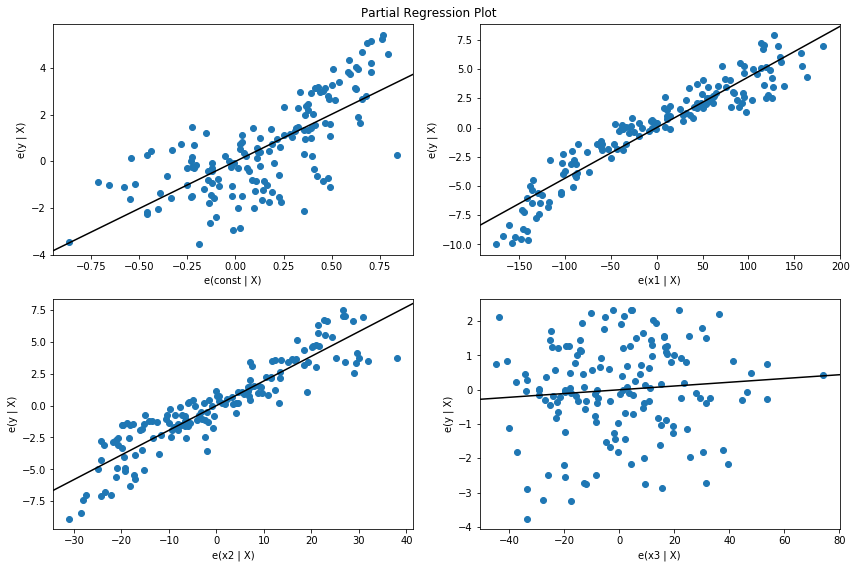

In [63]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(result2, fig=fig)

Figure above confirm hypothesis that X3 is irrelevant. This could mean a traditional advertisements are less important than social 

#### Model without newspaper feature

In [82]:
X_new2=np.column_stack((X1_new,X2_new)) # column stack function join three columns from our dataset to one matrix
X_new2=np.c_[np.ones(len(X1_new)),X_new2] # by this function we can add to matrix X column containing only ones, that's bias 
X_new2.shape

(153, 3)

In [84]:
model3 = sm.OLS(Y_new,X_new2)
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     1397.
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.07e-97
Time:                        18:28:30   Log-Likelihood:                -265.56
No. Observations:                 153   AIC:                             537.1
Df Residuals:                     150   BIC:                             546.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1322      0.276     14.961      0.000       3.586       4.678
x1             0.0435      0.001     35.689      0.000       0.041       0.046
x2             0.1955      0.007     29.845      0.000       0.183       0.208
==============================================================================
Omnibus:                        5.945   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                6.108
Skew:                          -0.469   Prob(JB):                       0.0472
Kurtosis:                       2.722   Cond. No.                         507.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

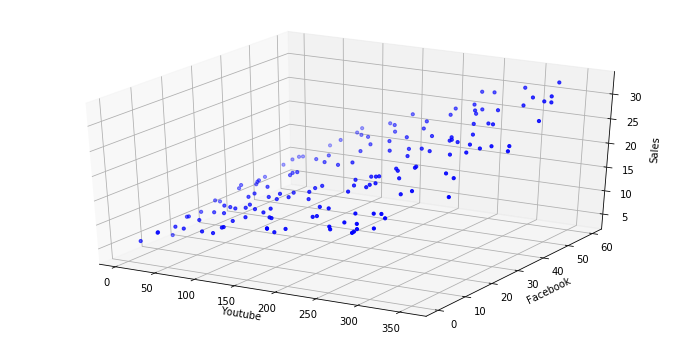

In [158]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

x1 = X1_new
x2 = X2_new
x3 = Y_new
ax.scatter(x1, x2, x3, c='b',s=10, marker='o')
ax.set_xlabel('Youtube')
ax.set_ylabel('Facebook')
ax.set_zlabel('Sales')
plt.show()